<a href="https://colab.research.google.com/github/rogalag/Notebooks/blob/master/Fritz_Style_Transfer_Train_your_own_style_in_minutes!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fritz Style Transfer

Train your own mobile-friendly style transfer model in minutes. Choose a style, train a model, and download a saved version in Keras, Core ML, or TensorFlow Mobile formats.

* To skip the training and get started quickly, head over to [Fritz](https://fritz.ai). 
* To see the final result, try our demo app, Heartbeat, available for both [iOS](bit.ly/heartbeat-ios) and [Android](bit.ly/heartbeat-android). 
* To dive into the soure code, head over to our [GitHub repository](https://github.com/fritzlabs/fritz-style-transfer). If you find it useful, **star the repository**!

To get started training, **copy this notebook by hittig the "OPEN IN PLAYGROUND" button at the top of the page.**

In [0]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install keras==2.2.4
!pip install git+https://github.com/apple/coremltools.git@master

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-plijncc4
  Running setup.py bdist_wheel for keras-contrib ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-3gdcy0vc/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
    100% |████████████████████████████████| 317kB 6.4MB/s 
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6
  Cloning https://github.com/apple/coremltools.git (to revision master) to /tmp/pip-req-build-c510wix7
  Running setup.py bdist_wheel for coremltools ... - \ | done
  Stored in directory: /tmp/pip-ephem-wheel-cache-61q1z60n/wheels/cf/4b/ab/6283da44c6aee811fe45f7c0ac5c5afbe9ec7b43d1003da3de
Successfully built coremltools
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement six~=1.11.0, but you'll have six 1.10.0 which 

In [0]:
import sys
import PIL.Image

## Clone the Fritz Style Transfer Repository

In [0]:
!git clone https://github.com/fritzlabs/fritz-style-transfer.git

Cloning into 'fritz-style-transfer'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 219 (delta 12), reused 5 (delta 2), pack-reused 188
Receiving objects: 100% (219/219), 1.08 MiB | 3.03 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [0]:
# Add the Fritz Style Transfer package to your python path
sys.path.append('/content/fritz-style-transfer/')

In [0]:
!mkdir fritz-style-transfer/data/

## Choose a style

Not all style images are equal. For the best results, pick images that:


1.   Have large geometric patterns on the scale of 10% - 33% of the images width
2.   Have bold, contrasting color palletes
3.   Have strong edges

If you're looking for inspiration, consider searching [Unslash](https://unspalsh.com) for [Flickr](https://www.flickr.com/search/) for terms like "abstract" or "geometric".

Make sure any images you use have an appropriate license.


In [0]:
# Replace the url at the end of the next line with one for the style image you want to use.
# Mine is taken from here: https://flic.kr/p/8QaLwY
!cd fritz-style-transfer/data/ && wget -O style_image.jpg https://farm5.staticflickr.com/4147/5139595004_9d5ab31bfe_b_d.jpg

--2018-10-23 22:42:13--  https://farm5.staticflickr.com/4147/5139595004_9d5ab31bfe_b_d.jpg
Resolving farm5.staticflickr.com (farm5.staticflickr.com)... 217.146.190.232
Connecting to farm5.staticflickr.com (farm5.staticflickr.com)|217.146.190.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 406387 (397K) [image/jpeg]
Saving to: ‘style_image.jpg’

style_image.jpg     100%[===================>] 396.86K   698KB/s    in 0.6s    

2018-10-23 22:42:14 (698 KB/s) - ‘style_image.jpg’ saved [406387/406387]



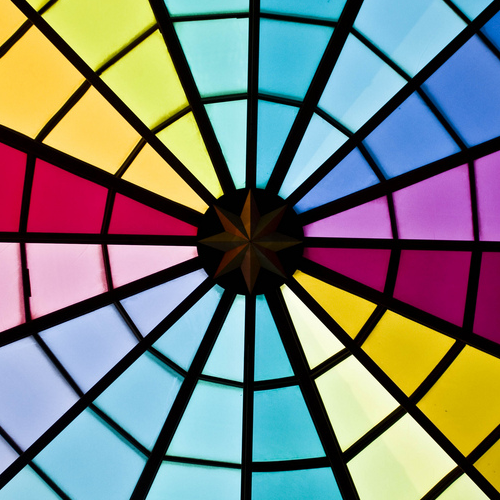

In [0]:
style_image = PIL.Image.open('/content/fritz-style-transfer/data/style_image.jpg')
# I'm cropping my style image to create a better pattern.
# You may not need this step.
style_image = style_image.crop(box=[250, 100, 750, 600])
style_image

## Download Training Data

We will use the 5000 images from the [COCO 2017 validation](http://cocodataset.org/#download) dataset for training.

In [0]:
!cd fritz-style-transfer/data/ && wget http://images.cocodataset.org/zips/val2017.zip
!unzip -d fritz-style-transfer/data/ fritz-style-transfer/data/val2017.zip

## Convert Training Data to TFRecord

This typically takes a minute or two to run.

In [0]:
!python fritz-style-transfer/create_training_dataset.py \
--output fritz-style-transfer/data/training_images.tfrecord \
--image-dir fritz-style-transfer/data/val2017/


## Train the model

With a GPU attached, you should be able to use a batch size of 24 images. With a batch size of 24, 500 iteratorations should be fine to get us to 12,000 total steps. Because the style we've chosen is highly geometric with a large pattern, lets decrease the style weight by a factor of 10 to make the output look more like the original pictures.

Training on a GPU takes about 20 minutes. If you get memory errors, it probably means your runtime is trying to use the CPU or your batch size is too big. Training on TPUs is not yet supported.

In [0]:
!cd fritz-style-transfer/ && export PYTHONPATH=`pwd` && python style_transfer/train.py \
--training-image-dset data/training_images.tfrecord \
--style-images data/style_image.jpg \
--model-checkpoint data/my_style_025.h5 \
--image-size 256,256 \
--alpha 0.25 \
--num-iterations 500 \
--batch-size 24 \
--style-weight 0.00001 \
--fine-tune-checkpoint example/starry_night_256x256_025.h5


Using TensorFlow backend.
INFO:trainer:Creating dataset from: data/training_images.tfrecord
INFO:trainer:Loading style images:
data/style_image.jpg
INFO:models:Loading weights from checkpoint: example/starry_night_256x256_025.h5
58892288/58889256 [==============================] - 2s 0us/step
INFO:trainer:Setting up network for training.
INFO:trainer:Content layers: block3_conv3
INFO:trainer:Style layers: block1_conv2,block2_conv2,block3_conv3,block4_conv3
tcmalloc: large alloc 1529741312 bytes == 0x22ee2000 @  0x7f1ca62c81e7 0x7f1c93ef95c5 0x7f1c9637fa99 0x7f1c9638a14a 0x7f1c965d833d 0x7f1c965e89a7 0x7f1c965e8e09 0x7f1c965ea0bd 0x7f1c92183aca 0x7f1c92183fdf 0x7f1c921f3822 0x7f1c921f15f7 0x7f1ca4baa57f 0x7f1ca5c8c6db 0x7f1ca5fc588f
tcmalloc: large alloc 3624108032 bytes == 0x9735e000 @  0x7f1ca62c81e7 0x7f1c93ef95c5 0x7f1c9637fa99 0x7f1c9638a14a 0x7f1c965d833d 0x7f1c965e89a7 0x7f1c965e8e09 0x7f1c965ea0bd 0x7f1c92183aca 0x7f1c92183fdf 0x7f1c921f3822 0x7f1c921f15f7 0x7f1ca4baa57f 0x7f1ca

## Stylize an image!

In [0]:
import style_transfer.models
import keras
# Clear the keras session of the training we just did
keras.backend.clear_session()
# Load the model

image_size = (640, 640)
model = style_transfer.models.StyleTransferNetwork.build(
    image_size, alpha=0.25, checkpoint_file='/content/fritz-style-transfer/data/my_style_025.h5')

In [0]:
from PIL import Image
import requests
from io import BytesIO

# Download an image to stylize
original_url = 'https://farm3.staticflickr.com/2907/14746369554_b783ba8d13_o_d.png'
response = requests.get(original_url)
original_image = PIL.Image.open(BytesIO(response.content))
original_image = original_image.resize(image_size)
original_image

In [0]:
import numpy
import matplotlib.pyplot as pyplot
# Pre-process input
input_data = numpy.array(original_image)[None, :, :, :3] - 120.0
output_data = model.predict(input_data)
output_image = PIL.Image.fromarray(output_data[0].astype('uint8'))
output_image

In [0]:
# Download the model
from google.colab import files

files.download('/content/fritz-style-transfer/data/my_style_025.h5')

## Convert out model to Core ML

In [0]:
!python fritz-style-transfer/convert_to_coreml.py \
--keras-checkpoint fritz-style-transfer/data/my_style_025.h5 \
--alpha 0.25 \
--image-size 640,640 \
--coreml-model fritz-style-transfer/data/my_style_025.mlmodel


In [0]:
# Download the mlmodel
from google.colab import files

files.download('/content/fritz-style-transfer/data/my_style_025.mlmodel')

## Convert to TensorFlow Mobile

In [0]:
!python fritz-style-transfer/convert_to_tfmobile.py \
--keras-checkpoint fritz-style-transfer/data/my_style_025.h5 \
--alpha 0.25 \
--image-size 640,640 \
--output-dir fritz-style-transfer/data/


In [0]:
# Download the optimized graph
from google.colab import files

files.download('/content/fritz-style-transfer/data/my_style_025_optimized.pb')